## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
mouse_metadata_df.head()
# Combine the data into a single dataset
combine_data_df=pd.merge(mouse_metadata_df,study_results_df,how='outer',on="Mouse ID")
# Display the data table for preview
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Check the number of mice.
dirtydata_mouse=len(combine_data_df["Mouse ID"].unique())
dirtydata_mouse

249

In [9]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

duplicate_rows = combine_data_df[combine_data_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Drop any duplicate rows
clean_data_df=combine_data_df.loc[combine_data_df["Mouse ID"]!="g989"]
len(clean_data_df["Mouse ID"].unique())


248

In [11]:
# Recheck the number of mice
clean_data_mice =len(clean_data_df["Mouse ID"].unique())
clean_data_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_groupby = clean_data_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
regimen_groupby

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

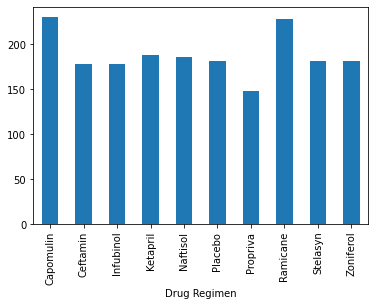

In [13]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
x_groupby=clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()
x_groupby.plot(kind='bar')

([<matplotlib.axis.XTick at 0x2e6cfc24240>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

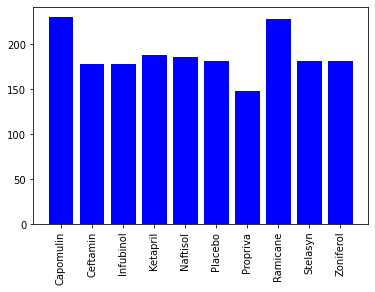

In [14]:
# Generate identical bar plot using pyplot instead of pandas.
x_groupby=x_groupby.reset_index()
drugs=x_groupby["Drug Regimen"]
mouseid=x_groupby["Mouse ID"]
drugs

plt.bar(drugs,mouseid,color="blue",align="center")
#plt.bar(drug, rain_df["Inches"], color='r', alpha=0.5, align="edge")
tick_locations = [drug for drug in drugs]
plt.xticks(tick_locations, drugs, rotation="vertical")



Sex
Female    922
Male      958
Name: Sex, dtype: int64

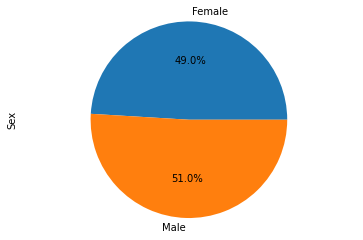

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groupby=clean_data_df.groupby("Sex")["Sex"].count()
gender_groupby.plot(kind="pie",y='Sex',autopct="%1.1f%%")
plt.axis("equal")
gender_groupby


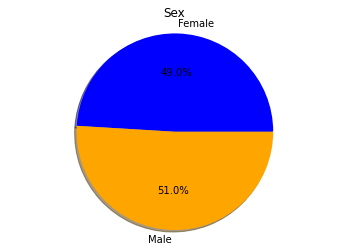

In [16]:
# Generate identical pie plot using pyplot
gender=["Female","Male"]
numbers=[922,958]
colors = ["blue", "orange"]
plt.title("Sex")
plt.pie(numbers, labels=gender, colors=colors,autopct="%1.1f%%", shadow=True,)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
id_groupby=clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
id_groupby=id_groupby.reset_index()
id_groupby.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#renaming to differntiate with the timepoint in the orig DF
#merged_data = max_tumor.merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")
merge_df=pd.merge(clean_data_df,id_groupby,on=["Mouse ID","Timepoint"], how="right")
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [18]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatments=[ "Capomulin", "Ramicane", "Infubinol","Ceftamin"]
vol=[]
for treatment in treatments:
    vol_x=merge_df.loc[merge_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]   
    vol.append(vol_x)
   
    quartiles = vol_x.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile  is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range  is: {iqr}")
    #outliers
    print(f"The lower bound is:{lower_bound}")
    print(f"The upper bound is:{upper_bound}")
   
   




The lower quartile  is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range  is: 7.781863460000004
The lower bound is:20.70456164999999
The upper bound is:51.83201549
The lower quartile  is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range  is: 9.098536719999998
The lower bound is:17.912664470000003
The upper bound is:54.30681135
The lower quartile  is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range  is: 11.477135160000003
The lower bound is:36.83290494999999
The upper bound is:82.74144559000001
The lower quartile  is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range  is: 15.577752179999997
The lower bound is:25.355449580000002
The upper bound is:87.66645829999999


{'whiskers': [<matplotlib.lines.Line2D at 0x2e6cfd7b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e6cfd7b9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e6cfd6ff60>,
 'medians': [<matplotlib.lines.Line2D at 0x2e6cfd860f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e6cfd86470>,
 'means': []}

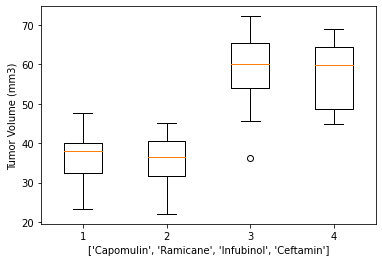

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel(treatments)
ax1.boxplot(vol)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

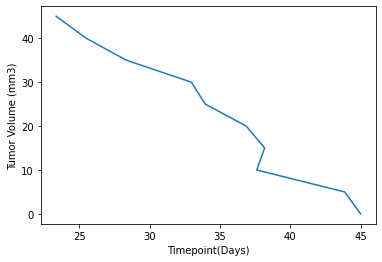

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

s185_data=clean_data_df.loc[(clean_data_df["Mouse ID"]=="s185")& (clean_data_df["Drug Regimen"]=="Capomulin"),["Tumor Volume (mm3)","Timepoint"] ]
tumor_data=s185_data["Tumor Volume (mm3)"]

timepoint_data=s185_data["Timepoint"]
timepoint_data
plt.plot(tumor_data,timepoint_data)
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'avg_vol_capomulin')

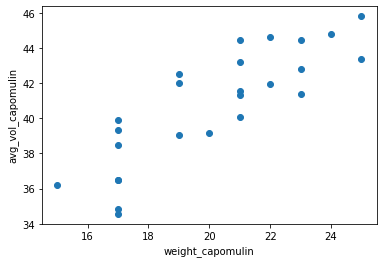

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_data=clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin")]
grp_df = capomulin_data.groupby(["Mouse ID"])
grp_df.head()
avg_vol=grp_df["Tumor Volume (mm3)"].mean() 
avg_weight=grp_df["Weight (g)"].mean()                               
vol=avg_vol.reset_index()
weight=avg_weight.reset_index()
avg_vol_capomulin=vol["Tumor Volume (mm3)"]
weight_capomulin=weight["Weight (g)"]
plt.scatter(weight_capomulin,avg_vol_capomulin,marker="o")
plt.xlabel('weight_capomulin')
plt.ylabel('avg_vol_capomulin')





## Correlation and Regression

0.8419363424694717


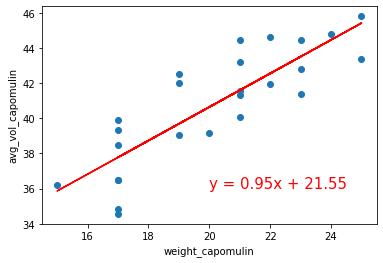

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_capomulin,avg_vol_capomulin)
cor_vol_weight=correlation[0]
print(cor_vol_weight)

#calculating the slope and intercept for the line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_capomulin,avg_vol_capomulin)

#creating the regress equation
regress_values = weight_capomulin * slope + intercept
#printing the regress line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter plot and plotting the regress line
plt.scatter(weight_capomulin,avg_vol_capomulin)
plt.plot(weight_capomulin,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('weight_capomulin')
plt.ylabel('avg_vol_capomulin')
plt.show()





# Observations and Insights

1. Analysis of the box plot shows (averge Tumor Volume wrt Drug Regimine)indicates that Capomuline was effective in reducing the tumor volume as compared to other drug regimens like Infubinol and Ceftamin. Just looking at this plot it is evident that Ramicane showed similar effects as Capomuline.
2. There is a direct and very high corelation between the Avg.Tumor Volume and the weight of the mouse.The trend is validate by a high positive correlation coefficient=0.8419363424694717.
3.Single mouse study(Avg Tumor Vol/timepoint) clearly indicate that the drug is succefully able to reduce the tumor vol by the timepoint end(45 days).